최적화 문제
최적화 문제란 어떤 목적함수의 함수값을 최적화(최대화 또는 최소화) 시키는 파라미터(변수) 조합을 찾는 문제  
- 목적 함수가 하나의 파라미터(변수)로 되어 있으면 일변수 함수 최적화, 여러개의 파라미터(변수)로 되어 있다면 다변수 함수 최적화


## 최소화

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
BASE = '/kaggle/input/pyda100/pyda100-master/6장/'
BASE_ = '/kaggle/input/pyda100/pyda100-master/7장/'

부품 보관 창고에서 생산 공장으로 물류 이동  
관련 데이터
- tbl_factory.csv : 생산공장데이터
- tbl_warehouse.csv : 창고데이터
- rel_cost.csv : 창고와 공장 간의 운송 비용
- tbl_transaction.csv : 2019년의 공장으로의 부품 운송 실적

#### Load data & Get some info

In [3]:
tbl_factory = pd.read_csv(BASE + 'tbl_factory.csv')
tbl_warehouse = pd.read_csv(BASE + 'tbl_warehouse.csv')
tbl_transaction = pd.read_csv(BASE + 'tbl_transaction.csv')
rel_cost = pd.read_csv(BASE + 'rel_cost.csv')

In [4]:
tbl_factory.head()

,FCID,FCName,FCDemand,FCRegion
0,FC00001,서울공장,28,북부
1,FC00002,수원공장,29,북부
2,FC00003,인천공장,31,북부
3,FC00004,대전공장,25,북부
4,FC00005,대구공장,21,남부


In [5]:
# 공장은 8개
tbl_factory["FCID"].value_counts()

FC00001    1
FC00002    1
FC00003    1
FC00004    1
FC00005    1
FC00006    1
FC00007    1
FC00008    1
Name: FCID, dtype: int64

In [6]:
tbl_warehouse.head()

,WHID,WHName,WHSupply,WHRegion
0,WH00001,판교창고,35,북부
1,WH00002,용인창고,41,북부
2,WH00003,수원창고,42,북부
3,WH00004,대전창고,60,남부
4,WH00005,대구창고,72,남부


In [7]:
# 창고는 6개
tbl_warehouse["WHID"].value_counts()

WH00001    1
WH00002    1
WH00003    1
WH00004    1
WH00005    1
WH00006    1
Name: WHID, dtype: int64

In [8]:
rel_cost.head()

,RCostID,FCID,WHID,Cost
0,1,FC00001,WH00001,0.4
1,2,FC00001,WH00002,0.8
2,3,FC00001,WH00003,1.5
3,4,FC00002,WH00001,0.9
4,5,FC00002,WH00002,0.8


In [9]:
tbl_factory_north = tbl_factory[tbl_factory["FCRegion"]=="북부"]
tbl_factory_south = tbl_factory[tbl_factory["FCRegion"]=="남부"]

In [10]:
tbl_warehouse_north = tbl_warehouse[tbl_warehouse["WHRegion"]=="북부"]
tbl_warehouse_south = tbl_warehouse[tbl_warehouse["WHRegion"]=="남부"]

In [11]:
# North warehouse to North factory
tmp_df = rel_cost[rel_cost["WHID"].isin(tbl_warehouse_north["WHID"].value_counts().index.tolist())]
tmp_df = tmp_df[tmp_df["FCID"].isin(tbl_factory_north["FCID"].value_counts().index.tolist())]
print("total cost from north(w) to north(f) : ", sum(tmp_df["Cost"]))

# North warehouse to South factory
tmp_df = rel_cost[rel_cost["WHID"].isin(tbl_warehouse_north["WHID"].value_counts().index.tolist())]
tmp_df = tmp_df[tmp_df["FCID"].isin(tbl_factory_south["FCID"].value_counts().index.tolist())]
print("total cost from north(w) to south(f) : ", sum(tmp_df["Cost"]))

total cost from north(w) to north(f) :  12.9
total cost from north(w) to south(f) :  0


In [12]:
# South warehouse to North factory
tmp_df = rel_cost[rel_cost["WHID"].isin(tbl_warehouse_south["WHID"].value_counts().index.tolist())]
tmp_df = tmp_df[tmp_df["FCID"].isin(tbl_factory_north["FCID"].value_counts().index.tolist())]
print("total cost from north(w) to north(f) : ", sum(tmp_df["Cost"]))

# South warehouse to South factory
tmp_df = rel_cost[rel_cost["WHID"].isin(tbl_warehouse_south["WHID"].value_counts().index.tolist())]
tmp_df = tmp_df[tmp_df["FCID"].isin(tbl_factory_south["FCID"].value_counts().index.tolist())]
print("total cost from north(w) to south(f) : ", sum(tmp_df["Cost"]))

total cost from north(w) to north(f) :  0
total cost from north(w) to south(f) :  12.600000000000001


In [13]:
tbl_transaction.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity
0,0,2019-01-01 02:11:10,FC00004,WH00003,33
1,1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2,2019-01-01 06:32:32,FC00006,WH00004,31
3,3,2019-01-01 07:17:06,FC00002,WH00003,18
4,4,2019-01-01 07:52:18,FC00001,WH00002,30


#### Merge data & Check total Cost

In [14]:
# FCID = ToFC / WHID = FromWH 기준으로 dataframe merge
# RCostID는 단순 ID 값
join_data = pd.merge(tbl_transaction, rel_cost, left_on = ["ToFC","FromWH"], right_on = ["FCID","WHID"],how="left")
join_data.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID,WHID,Cost
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8


In [15]:
# FCID = ToFC key를 바탕으로 factory 데이터 추가 merge
join_data = pd.merge(join_data, tbl_factory, left_on = "ToFC", right_on = "FCID", how="left")
join_data.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID_x,WHID,Cost,FCID_y,FCName,FCDemand,FCRegion
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1,FC00004,대전공장,25,북부
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3,FC00007,부산공장,25,남부
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9,FC00006,광주공장,30,남부
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6,FC00002,수원공장,29,북부
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8,FC00001,서울공장,28,북부


In [16]:
# WHID = FromWH key를 바탕으로 warehouse 데이터 추가 merge
join_data = pd.merge(join_data, tbl_warehouse, left_on = "FromWH", right_on = "WHID", how='left')
join_data = join_data[["TransactionDate","Quantity","Cost","ToFC","FCName","FCDemand","FromWH","WHName","WHSupply","WHRegion"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부


In [17]:
north = join_data[join_data["WHRegion"]=="북부"]
north.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
7,2019-01-01 09:09:30,12,1.5,FC00001,서울공장,28,WH00003,수원창고,42,북부
8,2019-01-01 10:52:55,27,1.5,FC00003,인천공장,31,WH00003,수원창고,42,북부


In [18]:
south = join_data[join_data["WHRegion"]=="남부"]
south.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
5,2019-01-01 08:56:09,31,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부
6,2019-01-01 09:00:15,33,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
9,2019-01-01 14:12:51,21,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부


In [19]:
print("북부 운송 비용 총합: {}".format(north["Cost"].sum()))
print("남부 운송 비용 총합: {}".format(south["Cost"].sum()))

북부 운송 비용 총합: 2189.3
남부 운송 비용 총합: 2062.0


In [20]:
print("북부 운송 개수 총합: {}".format(north["Quantity"].sum()))
print("남부 운송 개수 총합: {}".format(south["Quantity"].sum()))

북부 운송 개수 총합: 49146
남부 운송 개수 총합: 50214


남부 지사에서 운송 개수가 많으나 비용의 총합이 적다 -> 개당 운송 비용이 적다

In [21]:
north_tmp = (north["Cost"].sum()/north["Quantity"].sum())*10000
print("북부 지사 부품 1개당 운송 비용: {} 원".format(int(north_tmp)))
south_tmp = (south["Cost"].sum()/south["Quantity"].sum())*10000
print("남부 지사 부품 1개당 운송 비용: {} 원".format(int(south_tmp)))

북부 지사 부품 1개당 운송 비용: 445 원
남부 지사 부품 1개당 운송 비용: 410 원


In [22]:
cost_chk = pd.merge(rel_cost, tbl_factory, on="FCID",how="left")
print("북부 지사의 평균 운송 비용: {} 원".format(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="북부"].mean()))
print("남부 지사의 평균 운송 비용: {} 원".format(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="남부"].mean()))

북부 지사의 평균 운송 비용: 1.075 원
남부 지사의 평균 운송 비용: 1.05 원


#### 네트워크 가시화
단순 라이브러리 활용이 아니라,   
최적화 프로그램에 의하여 **도출된 계획을 가시화하는 프로세스**  
몇 가지 조건을 실제로 만족하는지를 확인하는 프로세스 확인

##### @ 네트워크 가시화 테스트

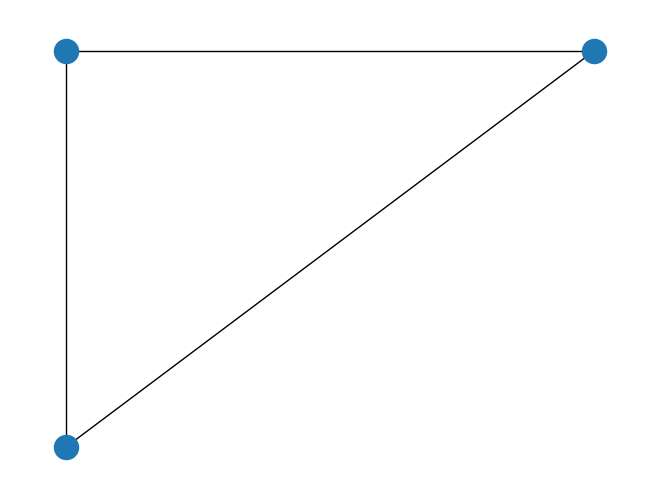

In [23]:
# 네트워크 가시화 라이브러리 로드
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 객체 생성
G = nx.Graph()

# 노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

# 엣지 설정
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")

# 좌표 설정
pos = {}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

# 그리기
nx.draw(G,pos)

# 표시
plt.show()

가중치 값: 
[6.39921, 1.4335300000000002, 9.44669, 5.21848, 0.0, 2.64556, 0.0, 4.5615, 5.68434, 0.0, 6.17635, 6.12096, 6.16934, 9.43748, 0.0, 0.0, 0.0, 6.97631, 0.60225, 6.66767, 6.706379999999999, 2.10383, 0.0, 3.15428, 0.0]
좌표 값
{'A': (0, 0), 'B': (0, 2), 'C': (2, 0), 'D': (2, 2), 'E': (1, 1)}


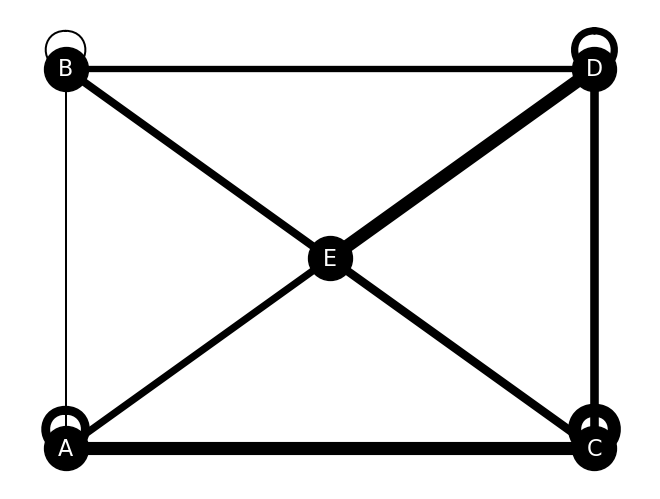

In [24]:
import pprint

test_network_w = pd.read_csv(BASE+'network_weight.csv')
test_network_p = pd.read_csv(BASE+'network_pos.csv')

# 엣지 가중치 리스트화
size = 10
edge_weights = []
for i in range(len(test_network_w)):
    for j in range(len(test_network_w.columns)):
        edge_weights.append(test_network_w.iloc[i][j]*size)
print("가중치 값: ")
print(edge_weights)   

# 그래프 객체 생성
G = nx.Graph()

## 기본 설정
# 노드 설정 ( 노드 그리기 위한 필수 정보 )
for i in range(len(test_network_w.columns)):
    G.add_node(test_network_w.columns[i])
    
# 엣지 설정 ( 노드 간 선 그리기 위한 필수 정보 )
for i in range(len(test_network_w.columns)):
    for j in range(len(test_network_w.columns)):
        G.add_edge(test_network_w.columns[i],test_network_w.columns[j])
        
## 추가 정보        
# 좌표 설정 
pos = {}
for i in range(len(test_network_w.columns)):
    node = test_network_w.columns[i]
    pos[node] = (test_network_p[node][0],test_network_p[node][1])

print("좌표 값")
pprint.pprint(pos)    

# 그리기
nx.draw(G, pos, with_labels=True, font_size=16,node_size = 1000, node_color='k', font_color='w', width=edge_weights)

# 표시
plt.show()

#### 네트워크 가시화(운송 경로) & 비용 분석

관련 데이터
- trans_route.csv : 운송 경로
- tans_route_pos.csv : 창고 및 공장의 위치 정보
- trans_cost.csv : 창고와 공장 간의 운송 비용
- demand.csv : 공장의 제품 생산량에 대한 수요
- supply.csv : 창고가 공급 가능한 최대 부품 수
- trans_route_new.csv : 새로 설계한 운송 경로

In [25]:
trans_route = pd.read_csv(BASE + 'trans_route.csv')
trans_route_pos = pd.read_csv(BASE + 'trans_route_pos.csv')
trans_cost = pd.read_csv(BASE + 'trans_cost.csv')

demand = pd.read_csv(BASE + 'demand.csv')
supply = pd.read_csv(BASE + 'supply.csv')
trans_route_new = pd.read_csv(BASE + 'trans_route_new.csv')

In [26]:
trans_route.head()

,공장,F1,F2,F3,F4
0,W1,15,15,0,5
1,W2,5,0,30,5
2,W3,10,15,2,15


In [27]:
trans_cost.head()

,공장,F1,F2,F3,F4
0,W1,10,10,11,27
1,W2,18,21,12,14
2,W3,15,12,14,12


In [28]:
trans_route.loc[0,"공장"]

'W1'

In [29]:
trans_route.loc[1][1]

5

In [30]:
# 창고 별 비용 계산 및 비용 총합 게산
warehouse_cost = {}
for i_w in range(len(trans_route)):
    cost_sum_by_warehouse = 0
    for j_f in range(1,len(trans_route.columns)):
        cost_sum_by_warehouse += (trans_route.loc[i_w][j_f] * trans_cost.loc[i_w][j_f])
    warehouse_cost[trans_route.loc[i_w,"공장"]] = cost_sum_by_warehouse
pprint.pprint(warehouse_cost)
print("total cost: {}".format(sum(warehouse_cost.values())))

{'W1': 435, 'W2': 520, 'W3': 538}
total cost: 1493


In [31]:
# # 그래프 객체 생성
# G = nx.Graph()

# # 노드 정보 추출
# trans_node = []

# # 노드 정보 추가
# for idx in range(len(trans_route)):
#     G.add_node(trans_route.iloc[idx][0]) # 창고 노드 정보 추가
#     trans_node.append(trans_route.iloc[idx][0])
    
# for idx in range(1,len(trans_route.columns)):
#     G.add_node(trans_route.columns[idx]) # 공장 노드 정보 추가
#     trans_node.append(trans_route.columns[idx])
    
# # 엣지 정보 추가
# for idx in range(len(trans_node)):
#     for jdx in range(len(trans_node)):
#         G.add_edge(trans_node[idx],trans_node[jdx])

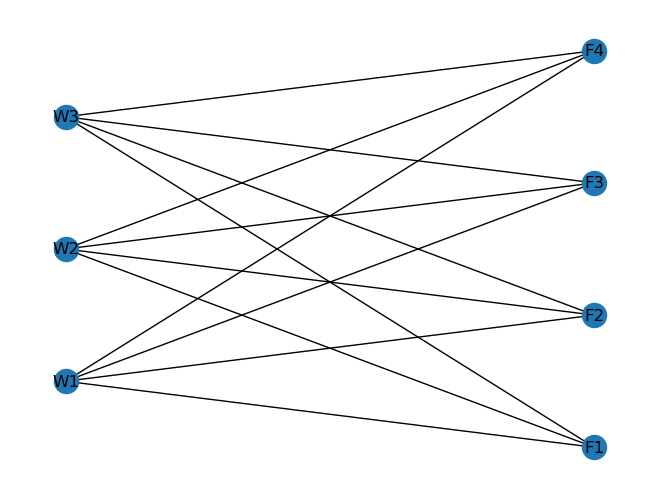

In [32]:
# 객체 생성
G = nx.Graph()

# 노드 설정
for i in range(len(trans_route_pos.columns)):
    G.add_node(trans_route_pos.columns[i])
    
# 엣지 설정(가중치 없음)
for i in range(0,3):
    for j in range(3,len(trans_route_pos.columns)):
        G.add_edge(trans_route_pos.columns[i],trans_route_pos.columns[j])

# 좌표 설정
pos = {}
for i in range(len(trans_route_pos.columns)):
    node = trans_route_pos.columns[i] 
    pos[node] = (trans_route_pos[node][0], trans_route_pos[node][1]) # trans_route_pos[node] == (x,y)

# 그리기
nx.draw(G,pos, with_labels=True)
plt.show()
    
# # 엣지 설정 및 가중치 리스트화
# num_pre = 0
# edge_weights = []
# size = 0.1
# for i in range(len(trans_route.columns)):
#     for j in range(len(trans_route.columns)):
#         if not(i==j):
#             # 엣지 추가
#             G.add_edge(trans_route.columns[i],trans_route_columns[j])
#             # 엣지 가중치 추가
#             if num_pre < len(G.adges):
#                 num_pre = len(G.edges)
#                 weight = 0
#                 if (trans_route.columns[i] in trans_route_pos.columns) and (trans_route.columns[j] in trans_route_pos.index):
#                     if trans_route[trans_route_pos.columns[i]][trans_route_pos.columns[j]]:
#                         weight = trans_route[trans_route_pos.columns[i]][trans_route_pos.columns[j]]*size
#                     elif

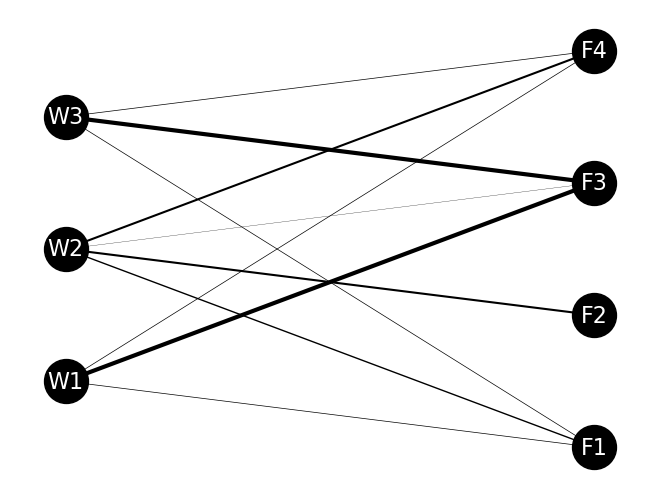

In [33]:
# 가중치 부여
weight = []
weight_resize = 0.1 # 가중치 값 축소
for i in range(1,len(trans_route.index)):
    for j in range(1,len(trans_route.columns)):
        weight.append(trans_route.iloc[i,j]*weight_resize)

# 가중치 부여 그래프 그리기
nx.draw(G,pos,with_labels=True,font_size=16,node_size=1000,node_color='k',font_color='w',width=weight) # width에 가중치 부여

plt.show()

#### 운송 비용 관련 분석

In [34]:
# 창고 별 비용 계산 및 비용 총합 게산
def total_cost(trans_route,trans_cost):
    cost_sum_by_warehouse = 0
    for i_w in range(len(trans_route)):
        for j_f in range(1,len(trans_route.columns)):
            cost_sum_by_warehouse += (trans_route.loc[i_w][j_f] * trans_cost.loc[i_w][j_f])
            
    print("total cost: {}".format(cost_sum_by_warehouse))
    
total_cost(trans_route,trans_cost)

total cost: 1493


In [35]:
demand = pd.read_csv(BASE+'demand.csv')
supply = pd.read_csv(BASE+'supply.csv')

In [36]:
print(demand)
print('--'*10)
print(supply)

   F1  F2  F3  F4
0  28  29  31  25
--------------------
   W1  W2  W3
0  35  41  42


In [37]:
trans_route

,공장,F1,F2,F3,F4
0,W1,15,15,0,5
1,W2,5,0,30,5
2,W3,10,15,2,15


In [38]:
sum(trans_route[demand.columns[0]]) > demand.iloc[0][0] 

True

In [39]:
# 수요 측 제한 조건
for idx in range(len(demand.columns)):
    # 공급량과 수요량 비교
    # 공장에서 생산하는 물품에 대한 수요가 최소 수요량 보다 많아야 하는 조건 부여
    if sum(trans_route[demand.columns[idx]]) > demand.iloc[0][idx] :
        print("수요 조건 만족")
    else:
        print("수요 조건 불만족")

수요 조건 만족
수요 조건 만족
수요 조건 만족
수요 조건 불만족


In [40]:
# 공급 측 제한 조건
for idx in range(len(supply.columns)):
    # 공급량과 수요량 비교
    # 창고에서 공급 가능한 분량 보다 공장에서 원하는 공급량이 적어야 하는 조건 부여
    if sum(trans_route[trans_route["공장"]==supply.columns[idx]].iloc[0][1:]) < supply.iloc[0][idx]:
        print("공급 조건 만족")
    else:
        print("공급 조건 불만족")

공급 조건 불만족
공급 조건 만족
공급 조건 불만족


In [41]:
# 다른 조건의 창고, 공장 데이터 로드
trans_route_new = pd.read_csv(BASE + 'trans_route_new.csv')
trans_route_new

,공장,F1,F2,F3,F4
0,W1,15,15,0,0
1,W2,5,0,30,10
2,W3,10,15,2,15


In [42]:
total_cost(trans_route_new,trans_cost)

total cost: 1428


In [43]:
print('Original route')
total_cost(trans_route,trans_cost)
print('New thing route')
total_cost(trans_route_new,trans_cost)

Original route
total cost: 1493
New thing route
total cost: 1428


total cost는 감소

In [44]:
# 수요 측 제한 조건
for idx in range(len(demand.columns)):
    # 공급량과 수요량 비교
    # 공장에서 생산하는 물품에 대한 수요가 최소 수요량 보다 많아야 하는 조건 부여
    if sum(trans_route_new[demand.columns[idx]]) > demand.iloc[0][idx] :
        print("수요 조건 만족")
    else:
        print("수요 조건 불만족")

수요 조건 만족
수요 조건 만족
수요 조건 만족
수요 조건 불만족


In [45]:
# 공급 측 제한 조건
for idx in range(len(supply.columns)):
    # 공급량과 수요량 비교
    # 창고에서 공급 가능한 분량 보다 공장에서 원하는 공급량이 적어야 하는 조건 부여
    if sum(trans_route_new[trans_route_new["공장"]==supply.columns[idx]].iloc[0][1:]) < supply.iloc[0][idx]:
        print("공급 조건 만족")
    else:
        print("공급 조건 불만족")

공급 조건 만족
공급 조건 불만족
공급 조건 불만족


#### 결론

주어진 데이터 내에서는 수요, 공급 조건을 만족하면서(제약조건)  
total cost가 감소하는 case가 미존재! --> 새로운 case 생성 필요

y = total cost  
x = 운송량  
a(상수) = 물류 비용  

##### 최적화 - scipy

In [46]:
trans_route = pd.read_csv(BASE_ + 'trans_cost.csv',index_col = '공장')
display(trans_route)

,F1,F2,F3,F4
공장,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [47]:
x_val_list = [[0]*4 for x in range(3)]
pprint.pprint(x_val_list)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [48]:
a_val_list = trans_cost.iloc[:,1:].to_numpy().tolist()
pprint.pprint(a_val_list)

[[10, 10, 11, 27], [18, 21, 12, 14], [15, 12, 14, 12]]


In [49]:
sum(a_val_list, [])

[10, 10, 11, 27, 18, 21, 12, 14, 15, 12, 14, 12]

In [50]:
# 새로운 case 생성 -> 최적화 라이브러리 활용
def obj_func(route):
    cost_sum_by_warehouse = 0
    cost = sum(trans_cost.iloc[:,1:].to_numpy().tolist(),[])
    for idx in range(len(cost)):
        cost_sum_by_warehouse += route[idx] * cost[idx]
    return cost_sum_by_warehouse

In [51]:
def constraint_demand(route):
    return_value = 0
    tmp_route = []
    for idx in range(3):
        tmp_route.append(route.tolist()[0+(idx*4):4+(idx*4)])
    for idx in range(4):
        tmp_sum_demand = 0
        # 이중 for문 안에서 각 공장 별 운송량 합산
        for jdx in range(3):
            tmp_sum_demand += tmp_route[jdx][idx]
        if tmp_sum_demand < demand.iloc[0][idx]:
            return_value -= 1
    
    return return_value

In [52]:
def constraint_supply(route):
    return_value = 0
    tmp_route = []
    for idx in range(3):
        tmp_route.append(route.tolist()[0+(idx*4):4+(idx*4)])
    for idx in range(3):
        tmp_sum_supply = sum(tmp_route[idx])
        if tmp_sum_supply > supply.iloc[0][idx]:
            return_value -= 1
    return return_value

In [53]:
cons = [{'type':'ineq', 'fun': constraint_supply},{'type':'ineq', 'fun': constraint_demand}]

In [54]:
from scipy.optimize import minimize
from scipy.optimize import Bounds
bounds = Bounds(lb=0,ub=float("inf"))
x0 = sum(x_val_list,[])
res = minimize(fun=obj_func,x0=x0,options={"disp":True,"maxiter":30},method='SLSQP',bounds=bounds,constraints=cons)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.0
            Iterations: 5
            Function evaluations: 13
            Gradient evaluations: 1


In [55]:
res
# scipy 최적화 실패

     fun: 0.0
     jac: array([10., 10., 11., 27., 18., 21., 12., 14., 15., 12., 14., 12.])
 message: 'Positive directional derivative for linesearch'
    nfev: 13
     nit: 5
    njev: 1
  status: 8
 success: False
       x: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

##### 최적화 - pulp.ortoolpy

In [56]:
!pip install ortoolpy

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [57]:
from itertools import product
from pulp import LpVariable, lpSum, value
from ortoolpy import model_min, addvars,addvals

In [58]:
nw = len(trans_route.index) # 3(창고)
nf = len(trans_route.columns) # 4(공장)
pr = list(product(range(nw),range(nf))) # product 함수를 사용하여 입력 값을 중복 없이 짝지음

print(pr)

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3)]


In [59]:
# 수리 모델
m1 = model_min() # 목적 함수, 현재 초기화 상태
v1 = {(i,j) : LpVariable('v%d_%d'%(i,j), lowBound=0) for i,j in pr}

print(m1)
print(v1)

NoName:
MINIMIZE
None
VARIABLES

{(0, 0): v0_0, (0, 1): v0_1, (0, 2): v0_2, (0, 3): v0_3, (1, 0): v1_0, (1, 1): v1_1, (1, 2): v1_2, (1, 3): v1_3, (2, 0): v2_0, (2, 1): v2_1, (2, 2): v2_2, (2, 3): v2_3}


In [60]:
# 목적 함수(m1)에 제약조건 추가
m1 += lpSum(trans_route.iloc[i][j] * v1[i,j] for i,j in pr) # 목적 함수 계산

# 제약조건 - 창고(W) - 창고별 총 공급량 <= 창고가 공급할 수 있는 최대량
for i in range(nw):
    m1 += lpSum(v1[i,j] for j in range(nf)) <= supply.iloc[0][i]
    

# 제약조건 - 공장(F) - 공장별 총 수요량 <= 공장에서 필요로 하는 최소 수요
for j in range(nf):
    m1 += lpSum(v1[i,j] for i in range(nw)) >= demand.iloc[0][j]
    
m1.solve() # 최적해 계산

1

In [61]:
print(m1)

NoName:
MINIMIZE
10*v0_0 + 10*v0_1 + 11*v0_2 + 27*v0_3 + 18*v1_0 + 21*v1_1 + 12*v1_2 + 14*v1_3 + 15*v2_0 + 12*v2_1 + 14*v2_2 + 12*v2_3 + 0
SUBJECT TO
_C1: v0_0 + v0_1 + v0_2 + v0_3 <= 35

_C2: v1_0 + v1_1 + v1_2 + v1_3 <= 41

_C3: v2_0 + v2_1 + v2_2 + v2_3 <= 42

_C4: v0_0 + v1_0 + v2_0 >= 28

_C5: v0_1 + v1_1 + v2_1 >= 29

_C6: v0_2 + v1_2 + v2_2 >= 31

_C7: v0_3 + v1_3 + v2_3 >= 25

VARIABLES
v0_0 Continuous
v0_1 Continuous
v0_2 Continuous
v0_3 Continuous
v1_0 Continuous
v1_1 Continuous
v1_2 Continuous
v1_3 Continuous
v2_0 Continuous
v2_1 Continuous
v2_2 Continuous
v2_3 Continuous



In [62]:
trans_route_sol = trans_route.copy()
total_cost = 0

for k,x in v1.items():
    i,j = k[0], k[1]
    trans_route_sol.iloc[i][j] = value(x) # 구해진 최적해
    total_cost += trans_route.iloc[i][j] * value(x)
    
display(trans_route_sol) # 최적해
print("총 운송 비용(최적값):",total_cost) # 총 운송비용 (최적값)

,F1,F2,F3,F4
공장,,,,
W1,28,7,0,0
W2,0,0,31,5
W3,0,22,0,20


총 운송 비용(최적값): 1296.0


## 최대화

관련 데이터
- product_plan_material.csv : 제품 제조에 필요한 원료 비율
- product_plan_profit.csv : 제품 이익
- product_plan_stock.csv : 원료의 재고량
- product_plan.csv : 제품의 생산량

In [63]:
product_plan_material = pd.read_csv(BASE_ + 'product_plan_material.csv', index_col = "제품")
product_plan_profit = pd.read_csv(BASE_ + 'product_plan_profit.csv', index_col = '제품')
product_plan_stock = pd.read_csv(BASE_ + 'product_plan_stock.csv',index_col = '항목')
product_plan = pd.read_csv(BASE_ + 'product_plan.csv', index_col = '제품')

In [64]:
display(product_plan_material, product_plan_profit, product_plan_stock, product_plan)

,원료1,원료2,원료3
제품,,,
제품1,1,4,3
제품2,2,4,1


,이익
제품,
제품1,5.0
제품2,4.0


,원료1,원료2,원료3
항목,,,
재고,40,80,50


,생산량
제품,
제품1,16
제품2,0


다항식 (x, y, z)  
제품 제조에 필요한 원료 비율 * 원료 재고  
제품1, 제품2를 어느 비율로 생산할 것인가?? --> 이익 최대화 포인트
--> 조정 가능한 것은 무엇인가? --> 조절 가능한 것은 생산량  
생산량이 목적 함수의 인자값이 되며, 제약 조건으로는 원료 재고와 원료 비율에 따른 생산 가능량이 된다.  

In [65]:
# 목적 함수
def obj_function(g1,g2):
    g1_cost = g1 * product_plan_profit.iloc[0][0]
    g2_cost = g2 * product_plan_profit.iloc[1][0]
    total_cost = g1_cost + g2_cost
    return total_cost

In [66]:
# 제약 조건
def constraint_function(g1,g2):
    # 개별 상황에 대한 제약
    if g1 > max(product_plan_stock.iloc[0][:] / product_plan_material.iloc[0][:]):
        return -1
    else:
        if 0 > min(product_plan_stock.iloc[0][:] - (product_plan_material.iloc[0][:]*g1)):
            return -1
    if g2 > max(product_plan_stock.iloc[0][:] / product_plan_material.iloc[1][:]):
        return -1
    else:
        if 0 > min(product_plan_stock.iloc[0][:] - (product_plan_material.iloc[1][:]*g2)):
            return -1
        
    # g1, g2 상호간 제약
    rest_of_stock = product_plan_stock.iloc[0][:] - product_plan_material.iloc[0][:]*g1
    if 0 > min(rest_of_stock - (product_plan_material.iloc[1][:]*g2)):
        return -1
    return 0

In [67]:
cons = [{'type':'ineq', 'fun': constraint_function}]

In [68]:
x_val_list = [[0]*4 for x in range(3)]
pprint.pprint(x_val_list)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [69]:
# from scipy.optimize import maximize --> scipy에서 maximize가 존재할거라 생각했지만 존재하지 않음
# from scipy.optimize import Bounds
# bounds = Bounds(lb=0,ub=float("inf"))
# x0 = sum(x_val_list,[])
# res = maximize(fun=obj_func,x0=x0,options={"disp":True,"maxiter":30},method='SLSQP',bounds=bounds,constraints=cons)

In [70]:
def prodcut_plan_func(df_profit, df_plan):
    profit = 0
    for i in range(len(df_profit.index)):
        profit += df_profit.iloc[i][0] * df_plan.iloc[i][0] # 이윤과 x 생산량(계획)을 통하여 수익 계산 
    return profit

print('총이익: ', prodcut_plan_func(product_plan_profit,product_plan))

총이익:  80.0


In [71]:
from pulp import LpVariable, lpSum, value
from ortoolpy import model_max, addvars, addvals

m2 = model_max() # 목적 함수 정의
v2 = {(i) : LpVariable('v%d'%(i), lowBound=0) for i in range(len(product_plan_profit))}

In [72]:
m2 += lpSum(product_plan_profit.iloc[i]*v2[i] for i in range(len(product_plan_profit))) # 초기 값 계산

for j in range(len(product_plan_material.columns)):
    m2 += lpSum(product_plan_material.iloc[i,j]*v2[i] for i in range(len(product_plan_profit))) <= product_plan_stock.iloc[:,j] # 제약 조건 추가 (생산량 * 원료 비율 <= 원료 재고량)
    
m2.solve()

1

In [73]:
product_plan_sol = product_plan.copy()
display(product_plan_sol) # original

for k, x in v2.items():
    product_plan_sol.iloc[k] = value(x) # v2 최적해
display(product_plan_sol) # renew

,생산량
제품,
제품1,16
제품2,0


,생산량
제품,
제품1,15
제품2,5


In [74]:
print(value(m2.objective))

95.0


In [75]:
constraint_function(15,5)

0